In [1]:
import os
os.chdir("current_path")

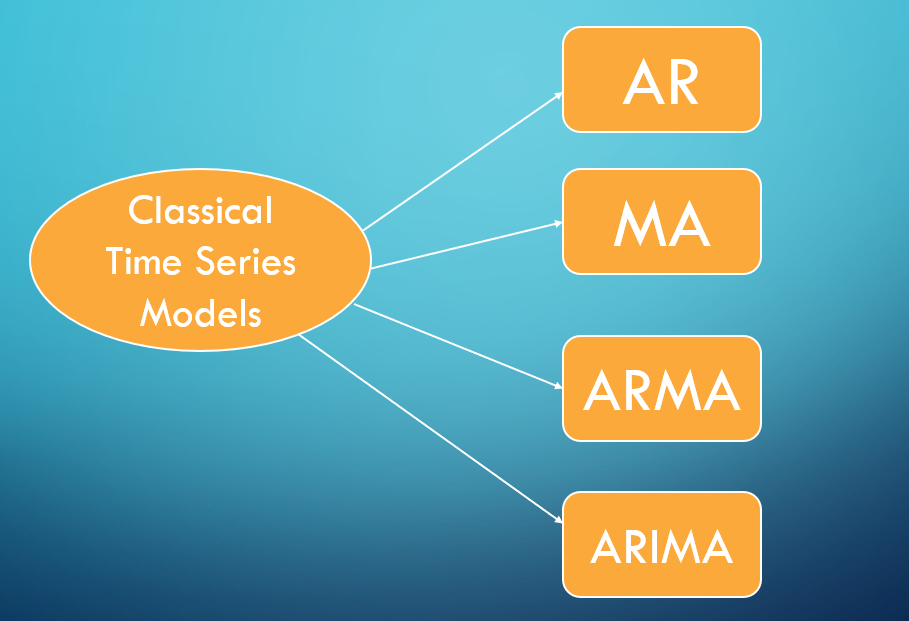

In [137]:
# put image here
from IPython.display import Image
Image(filename='classicalTSmodel.png') 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Auto regression example

In [3]:
# Auto Regression example - suitable for data without trend and seasonal component
from statsmodels.tsa.ar_model import AutoReg

# create a linear data
data = [10,12,14,16,18,20,20,22] #linear data 

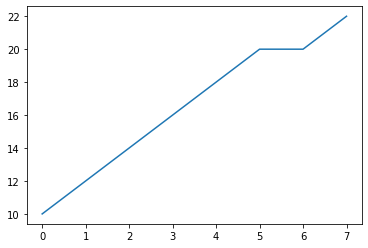

In [4]:
import matplotlib.pyplot as plt
plt.plot(data)

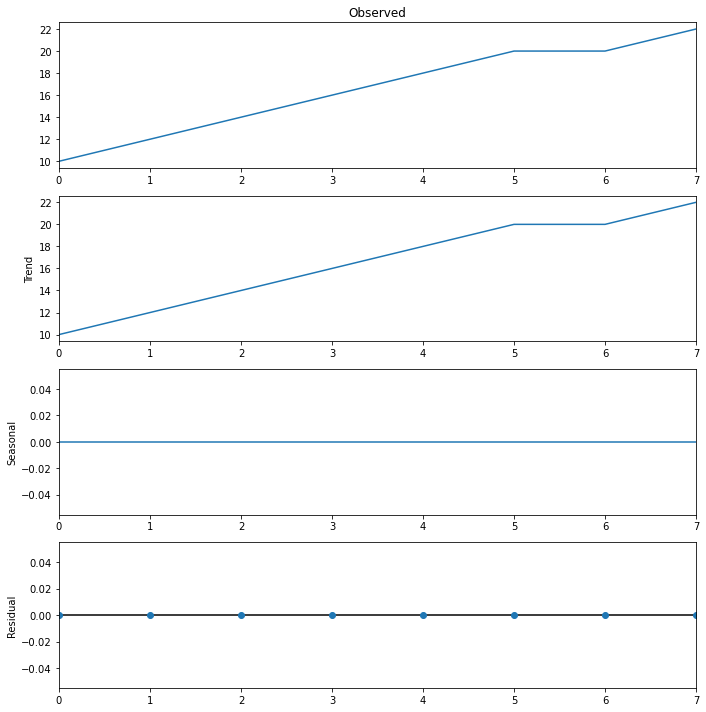

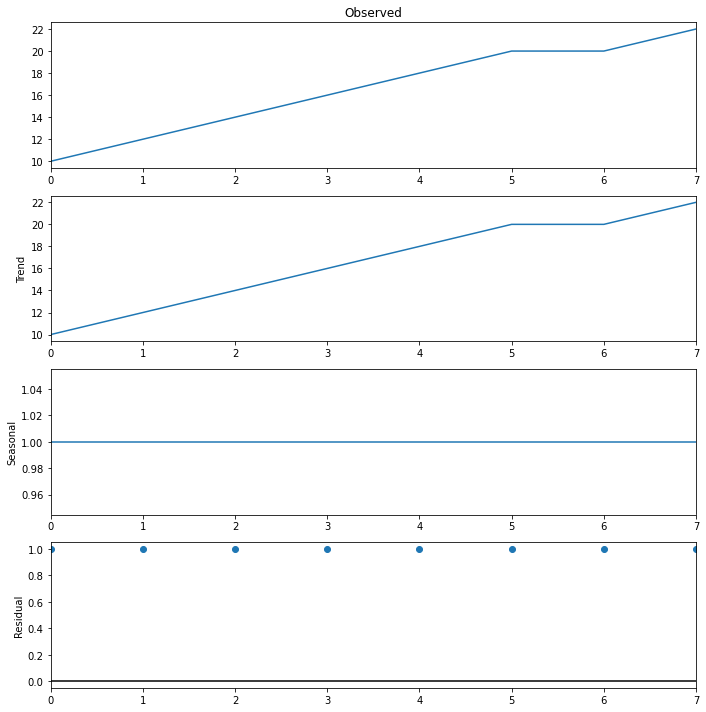

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# multiplicative decomposition
mul_decompos = seasonal_decompose(data, model='multiplicative', freq=1)

# additive decomposition
add_decompos = seasonal_decompose(data, model='additive', period = 1)


# plotting the decompositions
# additive decomposition plotting
plt.rcParams.update({'figure.figsize':(10,10)})
add_decompos.plot()
plt.show()

# multiplicative decomposition plotting
mul_decompos.plot()
plt.show()


In [7]:
from statsmodels.tsa.ar_model import AutoReg
ARmodel = AutoReg(data, lags=1) #calling Auto regression model, using lag as 1
ARmodel_fit = ARmodel.fit() #Fitting model

In [9]:
# making predictions
ypredicted = ARmodel_fit.predict(8,10)
print(ypredicted)
print(type(ypredicted)) # numpy.ndarray

[23.125      24.14453125 25.06848145]
<class 'numpy.ndarray'>


In [10]:
pred_list = ypredicted.tolist() # to convert data back to list
combinedlist = data + pred_list # concatenation of two lists

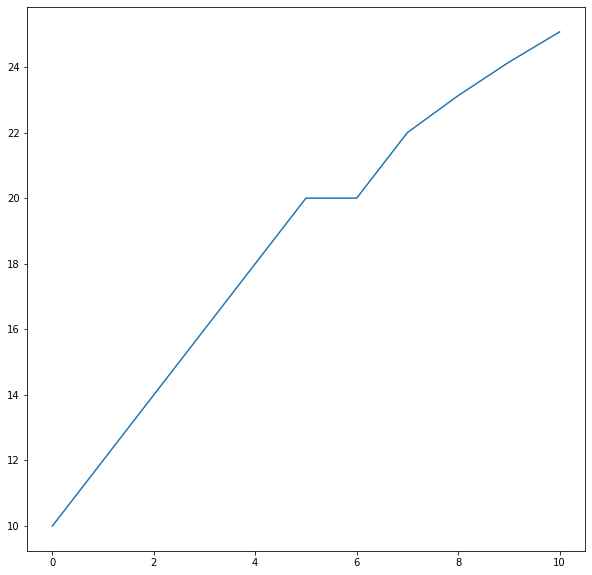

In [11]:
plt.plot(combinedlist)
# so AR takes the trends in the past data

# Moving average example

In [13]:
from statsmodels.tsa.arima_model import ARMA #suitable for data without trend and seasonality
# MA works on residuals

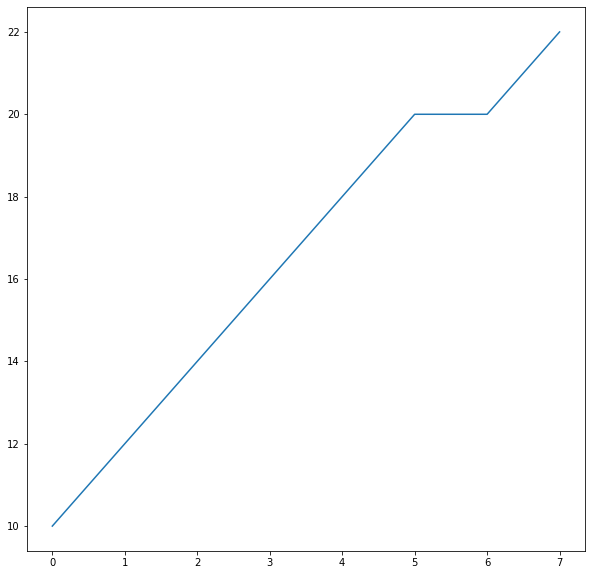

In [14]:
import matplotlib.pyplot as plt
plt.plot(data)

In [15]:
# fit model; order defines (AR, MA) -- so below one is MA model
MAmodel = ARMA(data, order=(0, 1)) #model with AR=0 and MA=1
MAmodel_fit = MAmodel.fit(disp=False)

In [16]:
# make prediction
ypredicted = MAmodel_fit.predict(8,10)
print(ypredicted)

[20.51276533 16.49884906 16.49884906]


In [17]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

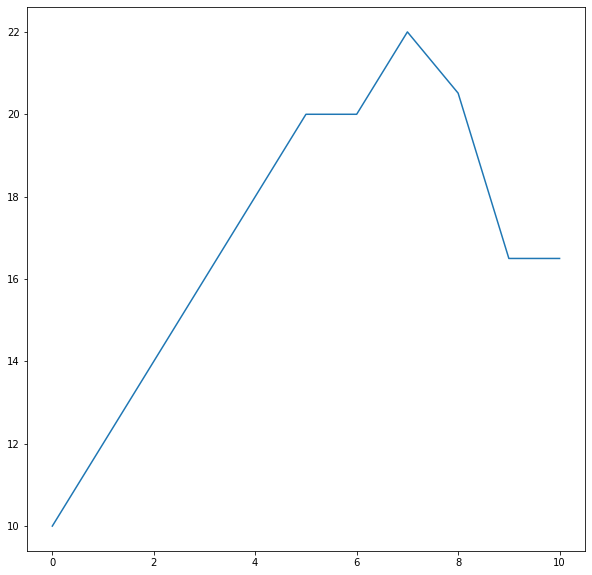

In [18]:
plt.plot(combinedlist)
# MA model takes the errors of the residuals for forcasting the next values

# Autoregressive Moving Average (ARMA)

In [19]:
# Import Data -  Australian Drug Sales
import pandas as pd
DrugSalesData = pd.read_csv('TimeSeries.csv', parse_dates=['Date'], index_col='Date')

In [21]:
DrugSalesData.head(10)

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
1991-01-12,4.306371
1992-01-01,5.088335
1992-01-02,2.814520
1992-01-03,2.985811


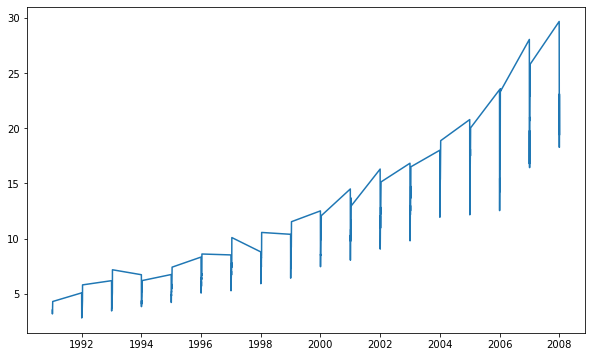

In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

In [23]:
# fit model
ARMAmodel = ARMA(DrugSalesData['Value'], order=(1, 1)) # taking both Ar,ma for model building
ARmodel_fit = ARMAmodel.fit(disp=True)

W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [24]:
# make prediction
ypredicted = ARmodel_fit.predict(len(DrugSalesData), len(DrugSalesData)+5)
print(ypredicted)

204    21.237080
205    21.181942
206    21.127125
207    21.072628
208    21.018448
209    20.964583
dtype: float64


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


# Autoregressive Integrated Moving Average (ARIMA)

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
# fit model
ARIMAmodel = ARIMA(DrugSalesData['Value'], order=(1, 1, 1)) #notice order(p,d,q); p- auto regression component
# d - integration component, which also depends on acf and pacf and q- MA component value here
ARIMA_model_fit = ARIMAmodel.fit(disp=False)

# make prediction
ypredicted = ARIMA_model_fit.predict(len(DrugSalesData), len(DrugSalesData)+2, typ='levels')
print(ypredicted)

203    21.584632
204    22.326893
205    22.626181
dtype: float64


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index b